# To see later

In [8]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import colorsys as c

exec(open("ode2.py").read(), globals())

In [27]:
a = 0.2
m = 8.
Param_phy = [a, m]
Init = [1, Param_phy[1]]


freq = 5.
Param_freq = {"p":  freq}#2
dt = min([0.1, 0.1/Param_freq["p"]]) ### Use small $dt$ (it could increse when we change the frequency) CHANGED
dt_ref = dt
finalTime = 500
finalTime_ref = finalTime

Param_strength = {"scale":0.0006} # 0.0008
Param_coupled = {"alpha":5., # 20
                 "beta":4.}# 500



Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}

<Figure size 1296x432 with 0 Axes>

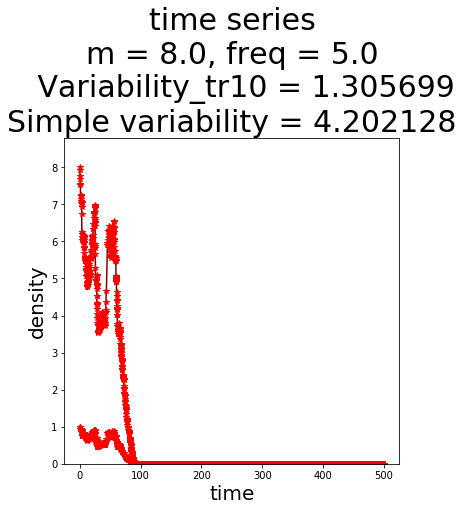

In [28]:
plt.figure(figsize = (18, 6))
O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt_ref, Fire_param = Fire_param)
O.solve_by_part()
var = O.variability("N+W")
var_a = np.var(O.N+O.W)
#plt.figure(figsize = (12, 6))
#plt.subplot(1, nParall, j+1)
plt.figure(figsize = (6, 6))
O.plot_time_series(generation=False, show=False, legend = False)
plt.title("time series\nm = "+str(m)+", freq = "+str(freq)+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 30)
plt.show()

## Phase space with fire

In [235]:
NN = O.N[:50]
WW = O.W[:50]
#XX, YY = np.meshgrid(NN[:-1], WW[:-1:])
U = NN[1::]-NN[:-1]
V = WW[1::]-WW[:-1]
UU, VV = np.meshgrid(U, V)

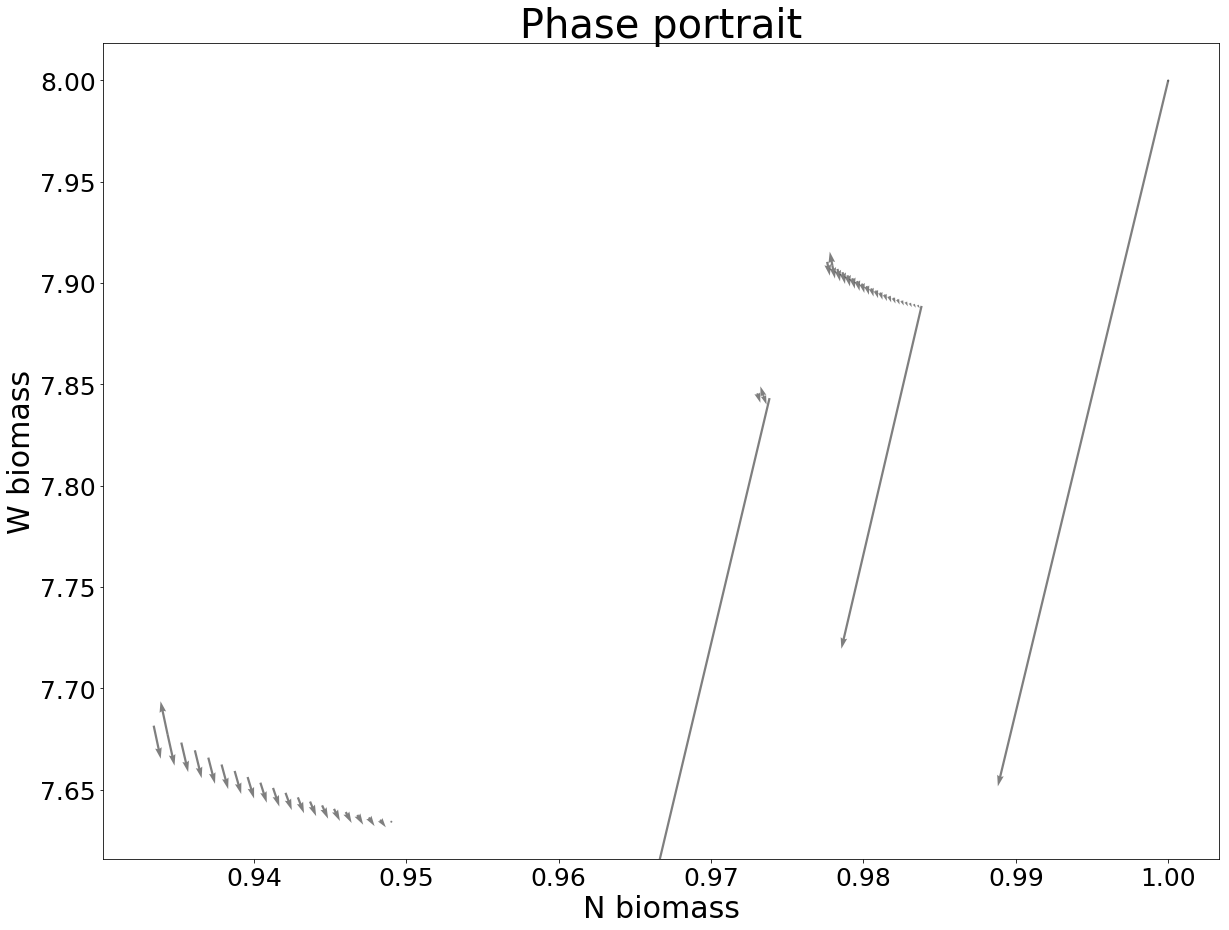

In [253]:
plt.figure(figsize=(20, 15))
#plt.quiver(NN, WW, U, V)
plt.quiver(NN, WW, U, V, alpha = 0.5, width = 0.002)
plt.xlabel("N biomass", fontsize = 30)
plt.xticks(fontsize = 25)
plt.ylabel("W biomass", fontsize = 30)
plt.yticks(fontsize = 25)
plt.title("Phase portrait", fontsize = 40)
plt.show()

# Donner l'intensité et la direction avec un code couleur (voir projet images 5A)

In [59]:
def mycomputeColor(u,v):
    """return the rgb image representing the flow field"""
    saturation = (u**2+v**2)**0.5
    sat_line = []
    for i in range(len(saturation)):
        sat_line += [max(saturation[i])]
    saturation_max = max(sat_line)
    saturation_scaled = saturation / saturation_max
    us = ((u+(u**2+v**2)**0.5)/2)**0.5
    vs = np.sign(v)*((-u+(u**2+v**2)**0.5)/2)**0.5
    hue = (np.pi/2-np.arctan(us/vs))/np.pi
    
    for i in range(len(hue)):
        for j in range(len(hue[0])):
            if(hue[i,j]!=hue[i,j]):  #if hue[i,j]=nan
                hue[i,j]=0.5  
    img_hsv = np.zeros((len(hue), len(hue[0]), 3))
    img_hsv[:,:,0] = hue
    img_hsv[:,:,1] = saturation_scaled
    img_hsv[:,:,2] = 1-(saturation_scaled*(1-saturation_scaled))**22
        
    # convert the hsv image into rgb
    
    img = np.zeros((len(hue), len(hue[0]), 3))
    for i in range(len(hue)):
        for j in range(len(hue[0])):
            img[i,j,:]=c.hsv_to_rgb(img_hsv[i,j,0],img_hsv[i,j,1],img_hsv[i,j,2])
        
    return img


def mycolorwheel(n):
    x=np.linspace(-1, 1, 2*n+1)
    y=np.linspace(-1, 1, 2*n+1)
    X,Y=np.meshgrid(x,y)
    circle = (X**2+Y**2 < 1)
    U=X*circle
    V=Y*circle
    return mycomputeColor(U,V)

In [150]:
def mycomputeColor_2(u,v):
    """return the rgb image representing the flow field"""
    saturation = (u**2+v**2)**0.5
    saturation_max = max(saturation)
    saturation_scaled = saturation / saturation_max
    us = ((u+(u**2+v**2)**0.5)/2)**0.5
    vs = np.sign(v)*((-u+(u**2+v**2)**0.5)/2)**0.5
    hue = (np.pi/2-np.arctan(us/vs))/np.pi
    
    for i in range(len(hue)):
        if(hue[i]!=hue[i]):  #if hue[i,j]=nan
            hue[i]=0.5  
    img_hsv = np.zeros((len(hue), 3))
    img_hsv[:,0] = hue
    img_hsv[:,1] = saturation_scaled
    img_hsv[:,2] = 1-(saturation_scaled*(1-saturation_scaled))**22
        
    # convert the hsv image into rgb
    
    img = np.zeros((len(hue), 3))
    for i in range(len(hue)):
        img[i,:]=c.hsv_to_rgb(img_hsv[i,0],img_hsv[i,1],img_hsv[i,2])        
    return img

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


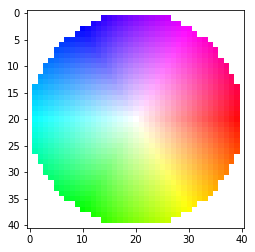

In [151]:
wheel = mycolorwheel(20)
plt.imshow(wheel)

### Normaliser les vecteur U et V

In [152]:
m = max(np.max(U), np.max(V))
U, V = U/m, V/m
Color = mycomputeColor_2(U,V)

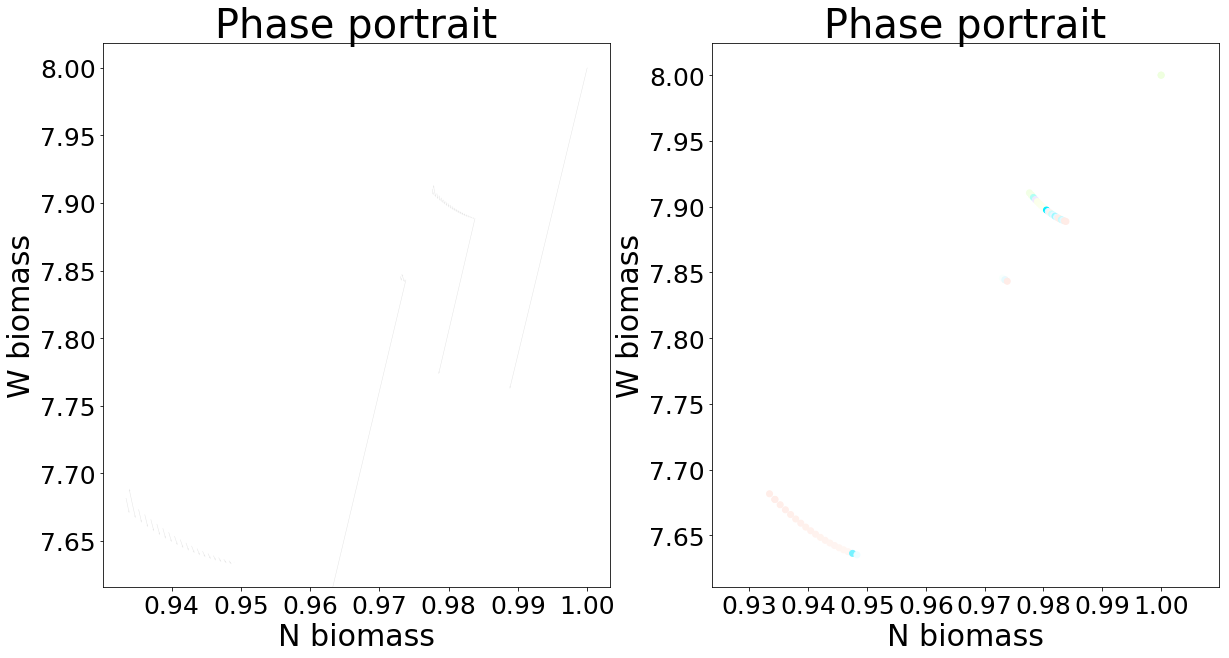

In [246]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.quiver(NN, WW, U, V, alpha = 0.1, width = 0.001)
plt.xlabel("N biomass", fontsize = 30)
plt.xticks(fontsize = 25)
plt.ylabel("W biomass", fontsize = 30)
plt.yticks(fontsize = 25)
plt.title("Phase portrait", fontsize = 40)

plt.subplot(1,2,2)
plt.scatter(NN[:-1:], WW[:-1:], c = Color)
plt.xlabel("N biomass", fontsize = 30)
plt.xticks(fontsize = 25)
plt.ylabel("W biomass", fontsize = 30)
plt.yticks(fontsize = 25)
plt.title("Phase portrait", fontsize = 40)
plt.show()


# Stochastic phase portrait

(-0.45750322437519664, 8)

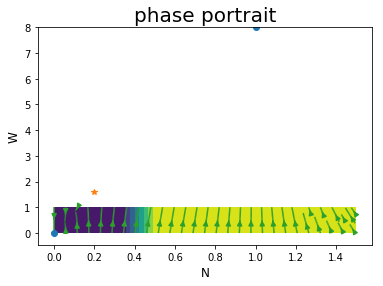

In [13]:
O.plot_phase_portrait_2(Xwindow = [0, 1.5], Ywindow = [0, 1.2*m], name="phase portrait", B_legend= False)
plt.ylim(top=8)

In [55]:
param1 = a
param2 = m
#param3 = d
Xwindow = [0, 1.5]
Ywindow = [0, 1.2*m]

X = np.linspace(Xwindow[0], Xwindow[1], 20)
Y = np.linspace(Ywindow[0], Ywindow[1], 20)
FN = np.zeros((len(X), len(Y)))
FW = np.zeros_like(FN)    
NN = np.zeros((len(X), len(Y), len(O.N)))
WW = np.zeros_like(U)

for i, x in enumerate(X):
    for j, y in enumerate(Y):
        O2 = O.copy()
        O2.Init = [x, y]
        N, W = O2.solve_by_part()
        FN[i,j], FW[i,j] = N[-1], W[-1]
        NN[i,j,:] = N
        WW[i,j,:] = W

eps = 1e-2
Extinction = FN < eps
Equilibrium1 = abs(FN-1) < eps
Equilibrium2 = abs(FN-param1) < eps

FN[Extinction] = 0
FN[Equilibrium1] = 1
FN[Equilibrium2] = param1

FN = FN.transpose()

XX, YY = np.meshgrid(X, Y)
#U = XX*(1-XX)*(XX-param1)
#V = param2*XX - YY

In [56]:
t0 = 0
t1 = len(O.N)-1
U = (NN[:,:,t1] - NN[:,:,t0])/(t1-t0)
V = (WW[:,:,t1] - WW[:,:,t0])/(t1-t0)

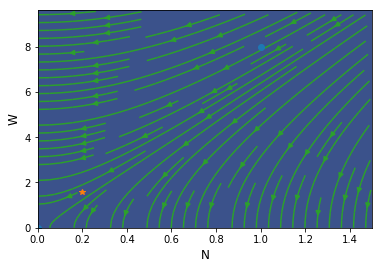

In [57]:
if(param1 < 1):
    plt.plot([0, 1], [0, param2], "o", label="stable\nequilibrium")
    plt.plot([param1], [param1*param2], "*", label="unstable\nequilibrium")
else:
    plt.plot([0, param1], [0, param1*param2], "o", label="stable\nequilibrium")
    plt.plot([1], [param2], "*", label="unstable\nequilibrium")
    
t = -1
plt.streamplot(XX, YY, U, V)
plt.contourf(XX, YY, FN)

#plt.title(name, fontsize=20)
plt.xlabel("N", fontsize=12)
plt.ylabel("W", fontsize=12)   

plt.show()

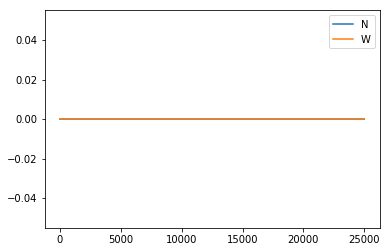

In [59]:
i,j = 0,0
plt.plot(NN[i,j,:], label="N")
plt.plot(WW[i,j,:], label="W")
plt.legend()
plt.show()